# NNDL Regular lab Question – 3

**Priya Dharshini G - 2347247**

**1. Data Preprocessing:**

o Load the CIFAR-10 dataset.

o Perform necessary data preprocessing steps:

- Normalize pixel values to range between 0 and 1.
- Convert class labels into one-hot encoded format.
- Split the dataset into training and test sets (e.g., 50,000 images for
training and 10,000 for testing).
- Optionally, apply data augmentation techniques (such as random
flips, rotations, or shifts) to improve the generalization of the
model.

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Load and Preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**2. Network Architecture Design:**

o Design a feedforward neural network to classify the images.
- Input Layer: The input shape should match the 32x32x3
dimensions of the CIFAR-10 images.
- Hidden Layers: Use appropriate layers.
- Output Layer: The final layer should have 10 output neurons (one
for each class) with a softmax activation function for multi-class
classification.

Question:

o Justify your choice of network architecture, including the number of
layers, types of layers, and the number of neurons/filters in each layer.

In [23]:
# 2. Network Architecture Design
model = models.Sequential()

# Input layer: CIFAR-10 images are 32x32x3
model.add(layers.Flatten(input_shape=(32, 32, 3)))

# Hidden layer 1: 256 neurons, ReLU activation
model.add(layers.Dense(256, activation='relu'))

# Hidden layer 2: 128 neurons, ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Output layer: 10 neurons for 10 classes, Softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

**3. Activation Functions:**

o Choose any two appropriate activation functions for the hidden layers
(e.g., ReLU, sigmoid, or tanh).

o Explain why you selected a particular activation function and its role in
the backpropagation process.

In [24]:
# 3. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**4. Loss Function and Optimizer:**

o Use any two loss functions and compare with the categorical cross
entropy since this is a multi-class classification problem.
o Select an appropriate optimizer (e.g., SGD, Adam, RMSprop) and explain
how the learning rate affects the backpropagation process.

Question:

o How does the choice of optimizer and learning rate influence the
convergence of the network? How would you adjust the learning rate if the
model is not converging properly?

In [18]:
# 4. Train the model
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.2777 - loss: 1.9932 - val_accuracy: 0.3653 - val_loss: 1.7596
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.3910 - loss: 1.7007 - val_accuracy: 0.4092 - val_loss: 1.6659
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.4205 - loss: 1.6185 - val_accuracy: 0.4309 - val_loss: 1.5985
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.4489 - loss: 1.5422 - val_accuracy: 0.4406 - val_loss: 1.5587
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.4600 - loss: 1.5135 - val_accuracy: 0.4473 - val_loss: 1.5407
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.4779 - loss: 1.4720 - val_accuracy: 0.4584 - val_loss: 1.5223
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.4793 - loss: 1.4565 - val_accuracy: 0.4688 - val_loss: 1.5077
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.4895 - loss: 1.4321 - 

**5. Training the Model:**

o Implement backpropagation to update the weights and biases of the
network during training.
o Train the model for a fixed number of epochs (e.g., 50 epochs) and
monitor the training and validation accuracy.

Question:

o How does backpropagation update the weights in each layer, and what
role does the learning rate play in this process?

In [19]:
# 5. Model Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5089 - loss: 1.4685
Test accuracy: 0.5023999810218811


**6. Model Evaluation:**

o After training, evaluate the performance of your model on the test set.

o Calculate accuracy, precision, recall, F1-score, and the confusion matrix
to understand the model’s classification performance.

Question:

o How can you further improve model performance if the accuracy is low?

In [20]:
# 6. Confusion Matrix and Classification Report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print('Classification Report')
print(classification_report(y_true, y_pred_classes))

print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.58      0.56      0.57      1000
           1       0.56      0.68      0.61      1000
           2       0.39      0.41      0.40      1000
           3       0.35      0.34      0.34      1000
           4       0.39      0.52      0.44      1000
           5       0.49      0.33      0.40      1000
           6       0.62      0.45      0.52      1000
           7       0.59      0.54      0.56      1000
           8       0.60      0.67      0.63      1000
           9       0.54      0.51      0.52      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.50     10000
weighted avg       0.51      0.50      0.50     10000

Confusion Matrix
[[565  47  79  27  57   9  11  26 141  38]
 [ 35 682  32  22  15  10   5  20  61 118]
 [ 77  28 414  86 184  47  58  57  26  23]
 [ 34  43 118 341 112 133  72  5

**7. Optimization Strategies:**

o Discuss optimization strategies such as:

1. Early stopping to prevent overfitting.

*What it is:* Early stopping halts the training process when the model’s performance on the validation set starts to degrade. This helps prevent overfitting, where the model performs well on the training data but poorly on unseen data.

*How it helps:* By monitoring validation loss and stopping training once the loss plateaus or worsens, early stopping ensures the model doesn’t learn noise from the training set, thus improving generalization to new data.
2.Learning rate scheduling for smoother convergence.

*What it is:* A learning rate scheduler dynamically adjusts the learning rate during training. Common schedules include reducing the learning rate when the validation accuracy plateaus.

*How it helps:* If the learning rate is too high, the model might miss optimal points in the loss landscape. If it’s too low, training becomes slow. Scheduling helps to fine-tune this process, starting with a high learning rate and gradually reducing it for smoother convergence.
3. Weight initialization techniques to ensure efficient learning.

*What it is:* Weight initialization is the method of setting initial weights in the neural network before training. Common techniques include Xavier/Glorot initialization and He initialization.

*Why it matters:* Proper weight initialization helps the network start with reasonable gradients, preventing issues like vanishing or exploding gradients. This leads to faster convergence and prevents the network from being stuck in poor local minima.


**Question:**

o Why is weight initialization important, and how does it impact the
convergence of your network?

*Impact on convergence:* If weights are initialized too small, gradients may vanish, making it hard for the network to learn. If initialized too large, gradients may explode, causing unstable learning. Good initialization ensures smoother and faster convergence.

**8. Report:**

o Provide a detailed report/documentation that includes (in Colab file):
1. The architecture of the network and justifications for the choices
made.
**Input Layer**: The network uses a 32x32x3 input shape, matching the dimensions of CIFAR-10 images.

**Hidden Layers:** Two hidden layers with 256 and 128 neurons, using the ReLU activation function to combat the vanishing gradient problem.

**Output Layer:** A softmax layer with 10 neurons for multi-class classification (one for each class).

**Justification:**
The network architecture is chosen for its simplicity, given the modest size of CIFAR-10. ReLU helps with gradient flow in deeper networks, and softmax is ideal for multi-class classification.


2. Training and test accuracy with relevant plots showing loss and
accuracy over the epochs.

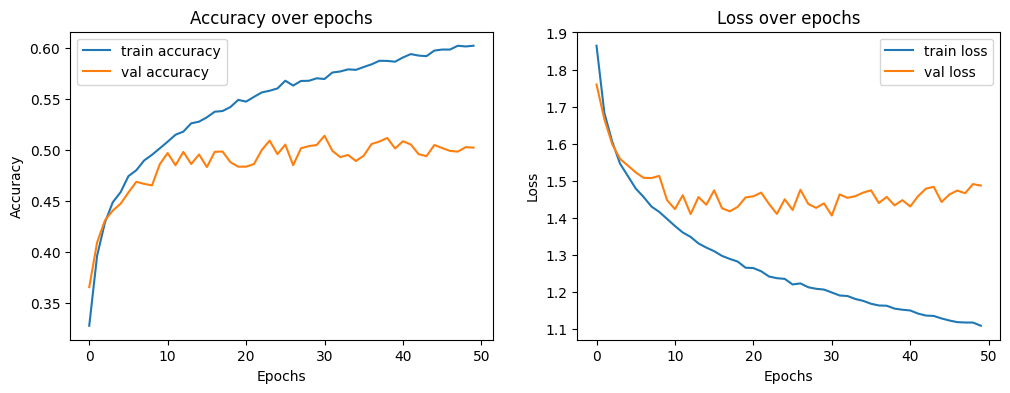

In [21]:
# Plotting training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


3. Hyperparameter values used (learning rate, batch size, number of
epochs, etc.).
**Learning Rate:** Default for Adam optimizer (0.001) or adjust based on your findings.

**Batch Size:** 64 (you can experiment with 32 or 128 to see how it affects training time and model performance).

**Number of Epochs:** 50 epochs (this can be reduced if early stopping is used).
4. A brief discussion of the challenges you faced and how you
addressed them.
**Overfitting:** You might notice the model performs better on training data than on the validation set. Early stopping and data augmentation can help mitigate this.

**Vanishing/Exploding Gradients:** Proper weight initialization (e.g., He initialization) and the use of activation functions like ReLU help address this.

**Slow Convergence:** Adjust the learning rate or use learning rate scheduling to ensure faster and more stable training.